# XGBoost

- [Online Course](https://www.trainindata.com/p/machine-learning-interpretability)

Here I show a model for regression, but it's the same code, apart from the model, if you want to do classification.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

### Load data

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X = X.drop(columns=["Latitude", "Longitude"])

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


### Visualize data

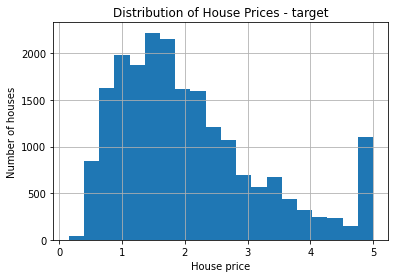

In [3]:
# Display the target distribution

y.hist(bins=20)
plt.xlabel("House price")
plt.ylabel("Number of houses")
plt.title("Distribution of House Prices - target")
plt.show()

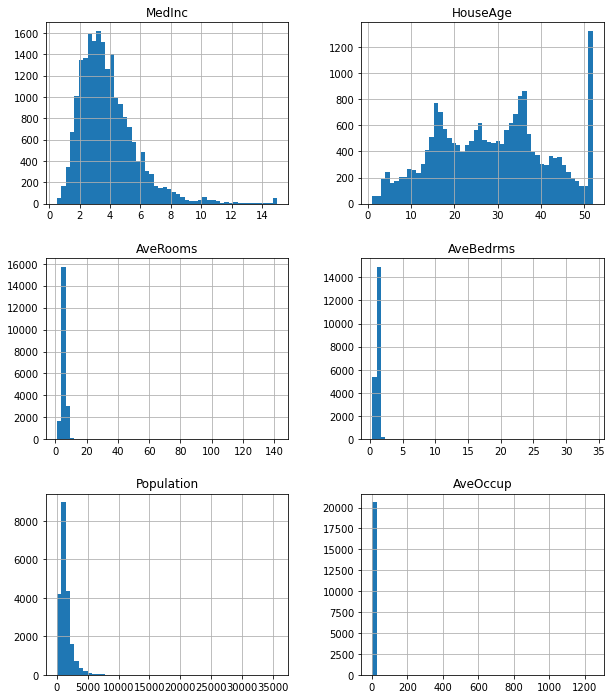

In [4]:
# Display the variables distribution

X.hist(bins=50, figsize=(10, 12))
plt.show()

### Split data

In [5]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((14448, 6), (6192, 6))

## XGBoost

In [9]:
# fit model

gbm = XGBRegressor(
    importance_type="gain",
    n_estimators=50,
    max_depth=3,
    random_state=3,
)

gbm.fit(X_train, y_train)

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\xgboost\data.py:298: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\xgboost\data.py:300: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\xgboost\data.py:365: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=3, reg_alpha=0,
             reg_lambda=1, ...)

In [10]:
# R2 in train set

gbm.score(X_train, y_train)

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\xgboost\data.py:298: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\xgboost\data.py:300: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:


0.7206446607390142

In [11]:
# R2 in test set

gbm.score(X_test, y_test)

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\xgboost\data.py:298: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\xgboost\data.py:300: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:


0.6765074517878717

The model explains more than 60% of the variability in the target variable.

## Global explanations - feature importance

In [12]:
# gbm importance

global_exp = pd.Series(gbm.feature_importances_, index=gbm.feature_names_in_)

global_exp

MedInc        0.640495
HouseAge      0.095081
AveRooms      0.075334
AveBedrms     0.021869
Population    0.017952
AveOccup      0.149268
dtype: float32

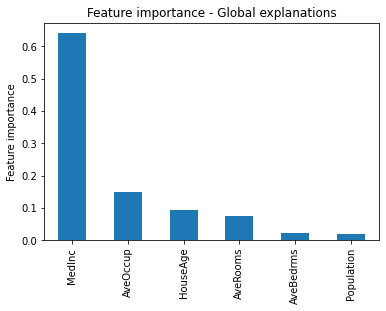

In [13]:
global_exp.sort_values(ascending=False).plot.bar()
plt.ylabel("Feature importance")
plt.title("Feature importance - Global explanations")
plt.show()

Let's compare the results with a different importance calculation:

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\xgboost\data.py:298: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\xgboost\data.py:300: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\xgboost\data.py:365: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


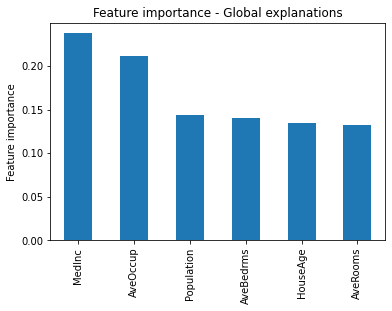

In [14]:
gbm = XGBRegressor(
    importance_type="weight",
    n_estimators=50,
    max_depth=3,
    random_state=3,
)

gbm.fit(X_train, y_train)

global_exp = pd.Series(gbm.feature_importances_, index=gbm.feature_names_in_)
global_exp.sort_values(ascending=False).plot.bar()
plt.ylabel("Feature importance")
plt.title("Feature importance - Global explanations")
plt.show()

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\xgboost\data.py:298: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\xgboost\data.py:300: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\xgboost\data.py:365: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


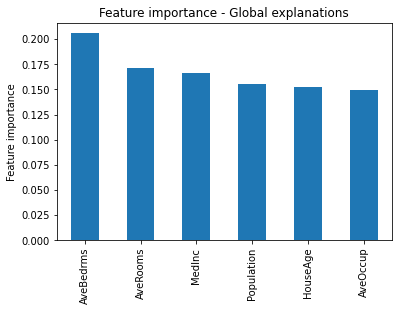

In [15]:
gbm = XGBRegressor(
    importance_type="cover",
    n_estimators=50,
    max_depth=3,
    random_state=3,
)

gbm.fit(X_train, y_train)

global_exp = pd.Series(gbm.feature_importances_, index=gbm.feature_names_in_)
global_exp.sort_values(ascending=False).plot.bar()
plt.ylabel("Feature importance")
plt.title("Feature importance - Global explanations")
plt.show()

The different importance metrics reflect different aspects of the ensemble. The gain returns very similar importance values to those returned by sklearn.

The weight (number of times a feature is selected at a node) and the cover (number of samples split at each node where the feature is used) give an alternative view of the effect of that feature on the ensemble. With this metrics, the importance of the features seems to be more "balanced".